In [1]:
!pwd


/content


In [2]:
#unzip and extract data files
from zipfile import ZipFile
file_name = "titanic.zip"

with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print("Done")

Done


In [ ]:
#remove the zipfile
!rm -rf titanic.zip

In [3]:
#load the train data
import pandas as pd
df_train = pd.read_csv("train.csv")
df_train.head(5)

df_test = pd.read_csv("test.csv")
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#converting sex to integers
df_train['Sex']= df_train['Sex'].map({"female":1 , "male":0})
df_test['Sex']= df_test['Sex'].map({"female":1 , "male":0})

In [5]:
#extract the titles from the names and label
df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df_test['Title'] = df_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# df_train['Title'].value_counts()
# print(df_test['Title'].value_counts())

titles = {"Mr": 1, "Mrs": 2, "Miss": 3, "Master": 4, "Ms":3, "Lady":3, "Countess":3, "Mme": 2, 
          "Mlle":3, "Dr":5, "Rev":5, "Col":5, "Major":5, "Don":5, "Capt":5, "Sir":5, "Jonkheer":5, "Dona":2 }   
df_train['Title']= df_train['Title'].map(titles)
df_test['Title']= df_test['Title'].map(titles)

print(df_train['Title'].value_counts())
print(df_test['Title'].value_counts())


1    517
3    187
2    126
4     40
5     21
Name: Title, dtype: int64
1    240
3     79
2     73
4     21
5      5
Name: Title, dtype: int64


In [6]:
#Assign the median value of each title category to fill missing age values

df_train.groupby('Title')['Age'].agg(['mean','median', 'min','max'])
df_train['Age'].fillna(df_train.groupby('Title')['Age'].transform('median'), inplace=True)
df_test['Age'].fillna(df_train.groupby('Title')['Age'].transform('median'), inplace=True)


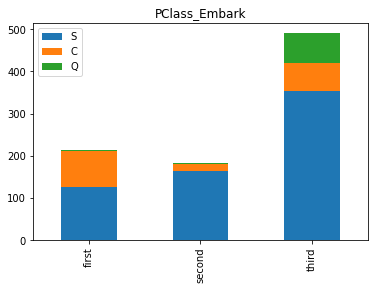

In [7]:
#Embarked 
first= df_train[df_train['Pclass']==1]['Embarked'].value_counts()
second= df_train[df_train['Pclass']==2]['Embarked'].value_counts()
third= df_train[df_train['Pclass']==3]['Embarked'].value_counts()
df_embark = pd.DataFrame([first, second, third])
df_embark.index = ['first','second','third']
df_embark.plot(kind = 'bar', stacked = True, figsize=(6,4), title ='PClass_Embark')

In [8]:
#barchart function
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

def bar_chart(feature):
  dead = df_train[df_train['Survived']==0][feature].value_counts()
  survived = df_train[df_train['Survived']==1][feature].value_counts()
  df_chart = pd.DataFrame([survived,dead])
  df_chart.index = ['survived','dead']
  df_chart.plot(kind = 'bar', stacked = False, figsize=(5,3), title =feature)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


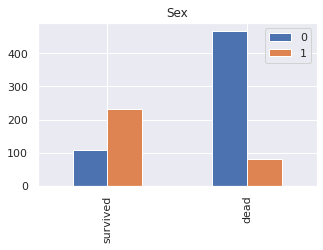

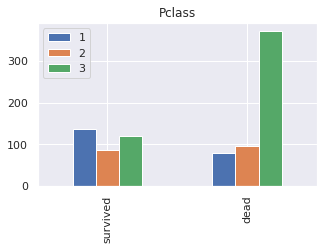

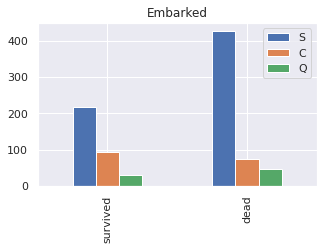

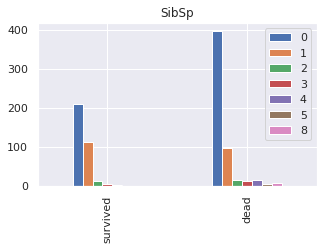

In [9]:
#plotting charts for train data
bar_chart('Sex')
bar_chart('Pclass')
bar_chart('Embarked')
bar_chart('SibSp')
# bar_chart('Pclass')


In [10]:
#Check the class of missing Embarked passegers
filt = (df_train['Embarked']=='S') | (df_train['Embarked']=='Q') | (df_train['Embarked']=='C')
df_train.loc[~filt]

#Assign S for those missing value
df_train['Embarked'].fillna('S', inplace=True)


In [11]:
#display the fare prices for Pclass
print(df_train.groupby('Pclass')['Fare'].agg(['mean','median', 'min','max']))
print('------------')
print(df_test.groupby('Pclass')['Fare'].agg(['mean','median', 'min','max']))
# print(df_test['Fare'].agg(['mean','median', 'min','max']))

             mean   median  min       max
Pclass                                   
1       84.154687  60.2875  0.0  512.3292
2       20.662183  14.2500  0.0   73.5000
3       13.675550   8.0500  0.0   69.5500
------------
             mean   median     min       max
Pclass                                      
1       94.280297  60.0000  0.0000  512.3292
2       22.202104  15.7500  9.6875   73.5000
3       12.459678   7.8958  3.1708   69.5500


In [12]:
#get the mean value of fare to the missing fare in test dataset

# df_nullfare = df_test[df_test.isna()['Fare']]
# print (df_nullfare)

df_test['Fare'].fillna(df_train.groupby('Pclass')['Fare'].transform('mean'), inplace=True)

In [13]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenge

In [14]:
#new column cabin_deck with the deck name exrtracted from cabin
df_train['Cabin_deck'] = df_train['Cabin'].str[:1]
df_test['Cabin_deck'] = df_test['Cabin'].str[:1]

print(df_train['Cabin_deck'].value_counts())
print(df_test['Cabin_deck'].value_counts())


C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_deck, dtype: int64
C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: Cabin_deck, dtype: int64


In [ ]:
#extract the surnames from the name
# df_train['Surname'] = df_train['Name'].str.extract('([A-Za-z]+)\, ', expand=False)
# df_train['Surname'].value_counts().head(5)
# df.head(10)

#extract the ticket number prefix from the ticket name
# df_train['Tict_Pref'] = df_train['Ticket'].str.extract('([A-Za-z]+)\ ', expand=False)
# print(df_train['Tict_Pref'].unique())
# print(df_train['Tict_Pref'].value_counts())

# print(df_train.groupby(['Pclass', 'Cabin_deck'])['Fare'].agg(['mean', 'median', 'min', 'max']))

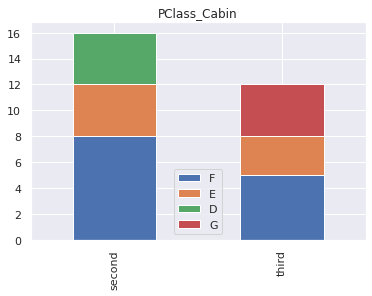

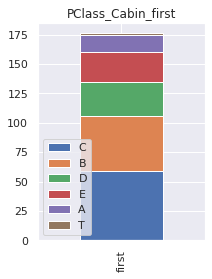

In [15]:
#plot graphs with cabin vs Pclass

first= df_train[df_train['Pclass']==1]['Cabin_deck'].value_counts()
second= df_train[df_train['Pclass']==2]['Cabin_deck'].value_counts()
third= df_train[df_train['Pclass']==3]['Cabin_deck'].value_counts()
df_cabin = pd.DataFrame([second, third])
df_cabin.index = ['second','third']
df_cabin.plot(kind = 'bar', stacked = True, figsize=(6,4), title ='PClass_Cabin')

df_cabin_first = pd.DataFrame([first])
df_cabin_first.index = ['first']
df_cabin_first.plot(kind = 'bar', stacked = True, figsize=(3,4), title ='PClass_Cabin_first')

In [16]:
#Assign 'N' for all the missing cabin deck values
df_train['Cabin_deck'].fillna(value='N', inplace=True)
df_test['Cabin_deck'].fillna(value='N', inplace=True)

#map the cabin values to intergers
deck = {"T": 0, "A": 1, "B": 2, "C": 3, "D": 4, "E":5, "F":6, "G":7, "N":8}
      
df_train['Cabin_deck']= df_train['Cabin_deck'].map(deck)
df_test['Cabin_deck']= df_test['Cabin_deck'].map(deck)


In [17]:
#mapping Embarked coumn to integers
Embark = {'S':1, 'C':2, 'Q':3}

df_train['Embarked']= df_train['Embarked'].map(Embark)
df_test['Embarked']= df_test['Embarked'].map(Embark)


In [18]:
#droping unwanted columns [Name, Ticket, Cabin, Ticket_pref]
df_train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)



In [19]:
#converting age to groups
data = [df_train, df_test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6


In [20]:
#converting fare values to integers
df_train['Fare'] = df_train['Fare'].astype(int)
df_test['Fare'] = df_test['Fare'].astype(int)

In [21]:
data = [df_train, df_test]
for dataset in data:
    dataset['family'] = dataset['SibSp']+ dataset['Parch']
    dataset['Age_Class'] = dataset['Age']* dataset['Pclass']

In [22]:
#get the quantilevalues for Fare for grouping
fare_arr = df_train['Fare'].values
pd.qcut(fare_arr,6)



[(-0.001, 7.0], (52.0, 512.0], (-0.001, 7.0], (52.0, 512.0], (7.0, 8.0], ..., (8.0, 14.0], (26.0, 52.0], (14.0, 26.0], (26.0, 52.0], (-0.001, 7.0]]
Length: 891
Categories (6, interval[float64]): [(-0.001, 7.0] < (7.0, 8.0] < (8.0, 14.0] < (14.0, 26.0] <
                                    (26.0, 52.0] < (52.0, 512.0]]

In [23]:
# #group the Fare based on 6 quantiles
data = [df_train, df_test]
for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7, 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 7) & (dataset['Fare'] <= 8), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 8) & (dataset['Fare'] <= 14), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 14) & (dataset['Fare'] <= 26), 'Fare'] = 4
    dataset.loc[(dataset['Fare'] > 26) & (dataset['Fare'] <= 52), 'Fare'] = 5
    dataset.loc[dataset['Fare'] > 52, 'Fare'] = 6 


In [24]:
df_test.head(3)
df_train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_deck,family,Age_Class
0,1,0,3,0,2,1,0,1,1,1,8,1,6
1,2,1,1,1,5,1,0,6,2,2,3,1,5
2,3,1,3,1,3,0,0,1,1,3,8,0,9


In [25]:
#X and y selection
X= df_train.drop(['Survived','PassengerId'], axis=1)
y = df_train.Survived

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [27]:
#model the data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

classifiers = [
   DecisionTreeClassifier(),
   RandomForestClassifier(),
   GradientBoostingClassifier(),
   GaussianNB()]

for classifier in classifiers:
  #  pipe = Pipeline(steps=[('classifier', classifier)])
   classifier.fit(X_train, y_train)
   y_pred = classifier.predict(X_test)
   print(classifier)
   print('Accuracy: %.3f', accuracy_score(y_test, y_pred))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Accuracy: %.3f 0.8435754189944135
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start

In [32]:
#grid search for optimum hyperparameters
rf = RandomForestClassifier()

param_grid = {
   'n_estimators': [100, 400, 700, 1000, 1500],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [8,10,12,14,16],
   'min_samples_leaf' : [1, 5, 10, 25, 50, 70],
   'criterion' :['gini', 'entropy']} 


from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(rf, param_grid, cv= 6, n_jobs =-1, verbose=1)           
                
CV.fit(X, y) 
print(CV.best_params_)
print(CV.best_score_)



Fitting 6 folds for each of 900 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 59.4min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 75.0min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 92.6min


{'criterion': 'entropy', 'max_depth': 16, 'max_features': 'log2', 'min_samples_leaf': 5, 'n_estimators': 100}
0.8428789527782815


[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed: 100.5min finished


In [33]:
#prepare the test data for prediction
df_test.head(3)
passenger_Id = df_test['PassengerId']
X_test_final = df_test.drop('PassengerId', axis =1)

In [34]:
print(X_test_final.shape)
print(passenger_Id.shape)

(418, 11)
(418,)


In [35]:
#predictions for the test data
rfm = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=16, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rfm.fit(X_train,y_train)
y_pred_final = rfm.predict(X_test_final)


In [36]:
#get the answer to a df with passengerID and survived columns
y_pred_series = pd.Series(y_pred_final, name='Survived')
answer_df= pd.concat([passenger_Id, y_pred_series], axis =1)


In [37]:
from google.colab import files
answer_df.to_csv('titanic.csv', index=False) 
files.download('titanic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>